# ML_PROJECT

# HOUSE PRICE PREDICTION

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

In [3]:
df1=pd.read_csv("bengaluru_house_prices.csv")
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df1.shape

(13320, 9)

# DATA-CLEANING: HANDLING NULL VALUES

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [6]:
df1.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [7]:
df1.groupby("area_type")["area_type"].agg("count")

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

# Data Visualization

<Axes: >

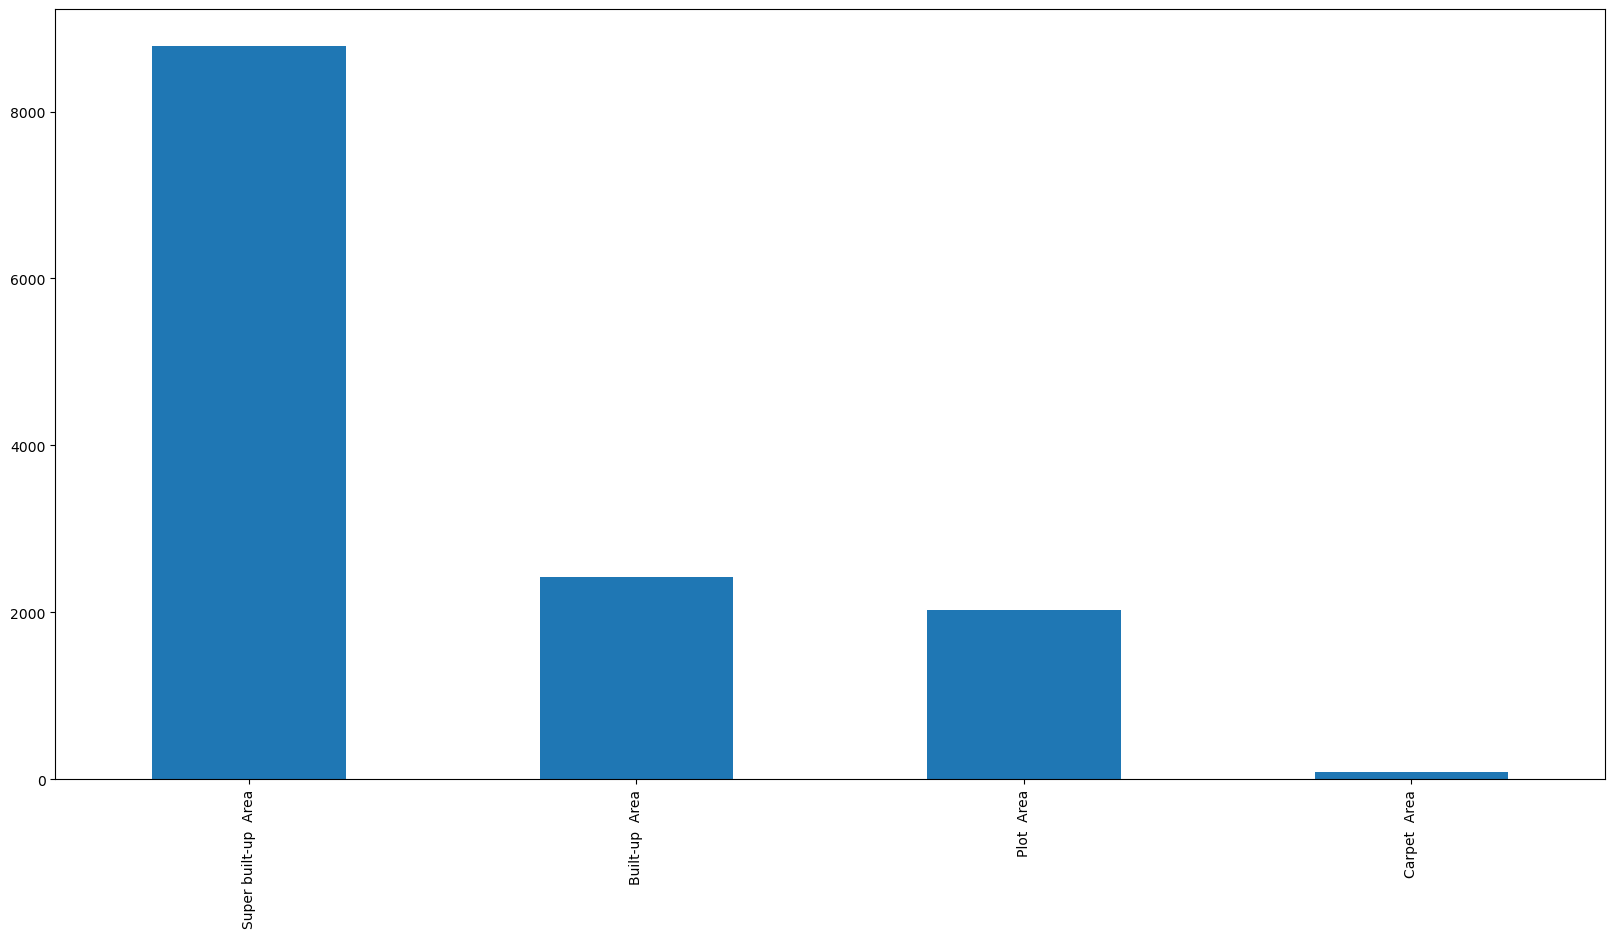

In [8]:
df1.area_type.value_counts().plot(kind='bar')

<Axes: >

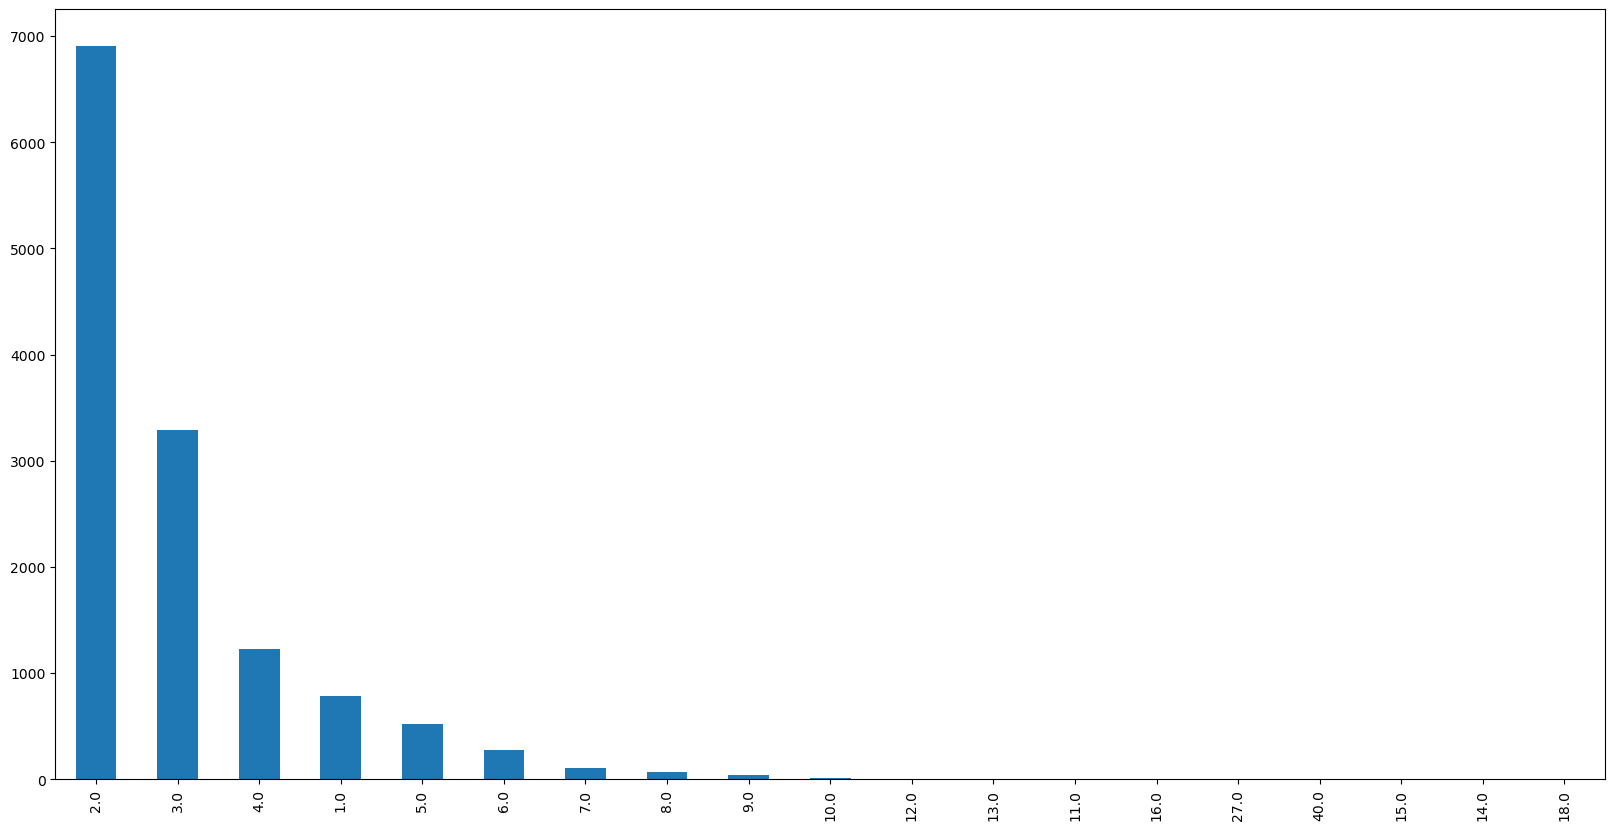

In [9]:
df1.bath.value_counts().plot(kind='bar')


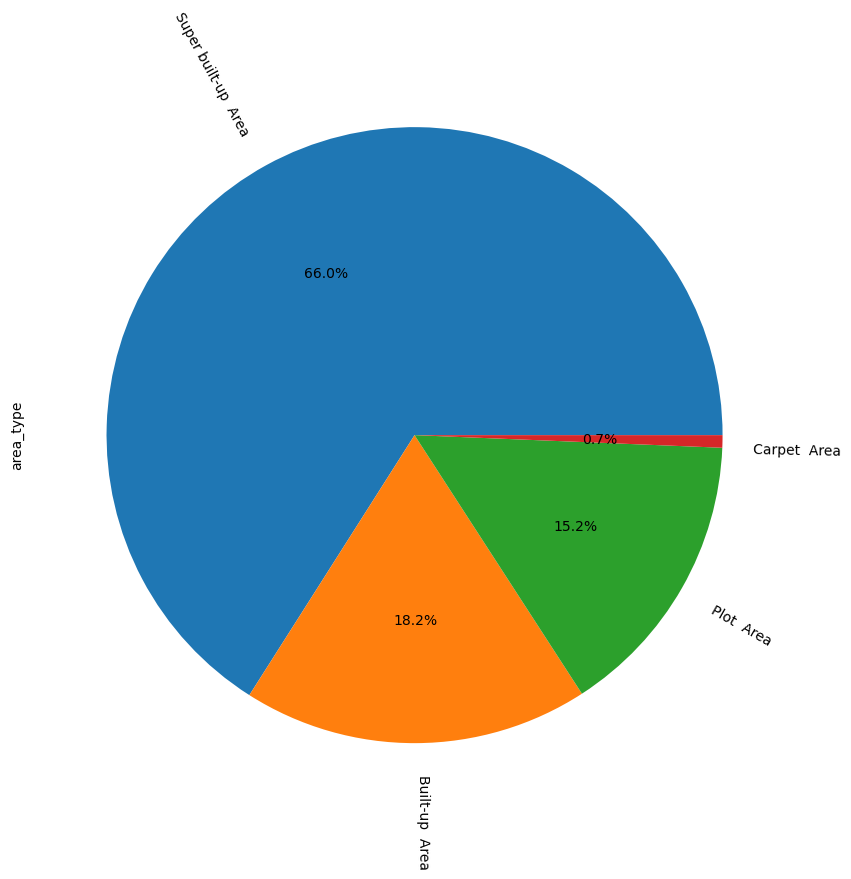

In [10]:
(df1["area_type"].value_counts()).plot.pie(autopct="%.1f%%", shadow=False,rotatelabels=True, wedgeprops={'linewidth': 6}, radius=1)
plt.show()

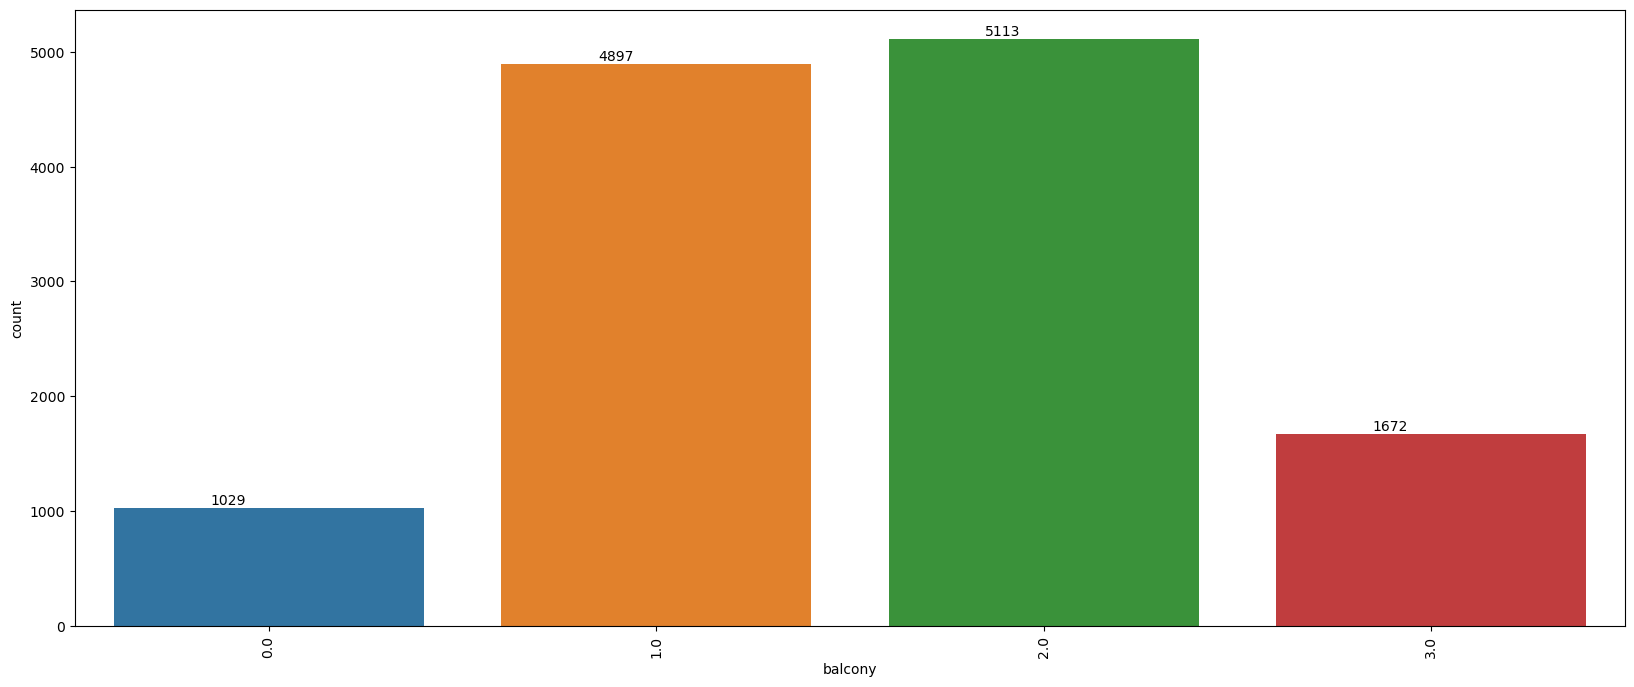

In [11]:
import seaborn as sns
plt.figure(figsize = (20,8))
ax=sns.countplot(x = 'balcony', data = df1)
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va = 'bottom', color = 'black')

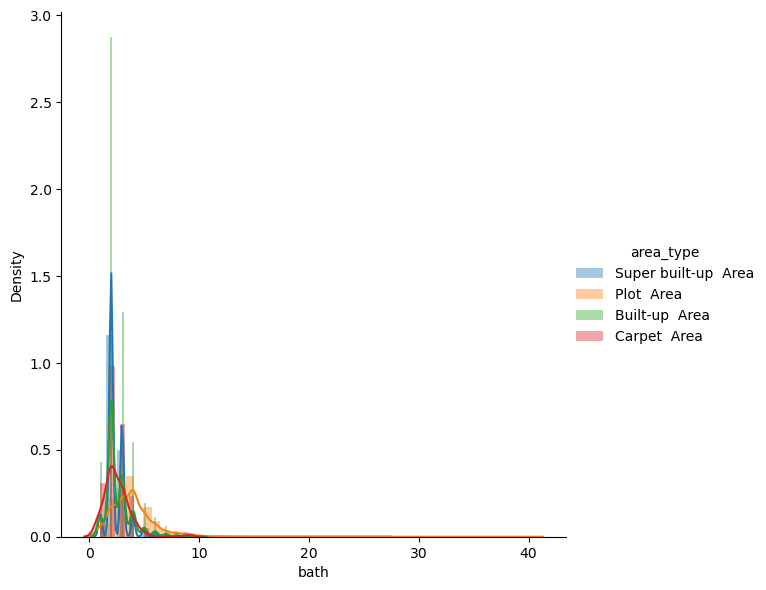

In [12]:
import warnings
warnings.filterwarnings('ignore')

sns.FacetGrid(df1, hue='area_type', height=6).map(sns.distplot, 'bath').add_legend()
plt.show()

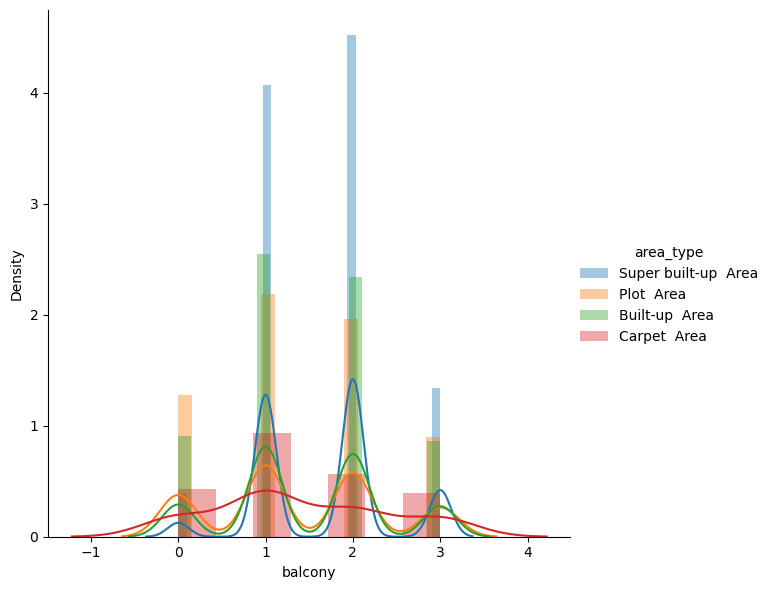

In [13]:
sns.FacetGrid(df1, hue='area_type', height=6).map(sns.distplot, 'balcony').add_legend()
plt.show()

In [14]:
#DROPPING SOM NOT REQUIRED FEATURES
df2 = df1.drop(['area_type','society','balcony','availability'],axis='columns')
df2.shape

(13320, 5)

# Handling Null Values

In [15]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [16]:
df2.shape

(13320, 5)

In [17]:
df3=df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [18]:
df3.shape

(13246, 5)

In [19]:
# converting n bhk into n
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0])) #split when we encontered space and extract only 1st part of it and put in bhk column
df3.bhk.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [20]:
def is_float(x):
    try:
        float(x)  # if x can be converted into float,make it float
    except:
        return False
    return True

In [21]:
filtered_df = df3[~df3['total_sqft'].apply(is_float)].head(10)
print(filtered_df) #printing all total_sqft values that cannot be converted into float

               location       size      total_sqft  bath    price  bhk
30            Yelahanka      4 BHK     2100 - 2850   4.0  186.000    4
122              Hebbal      4 BHK     3067 - 8156   4.0  477.000    4
137  8th Phase JP Nagar      2 BHK     1042 - 1105   2.0   54.005    2
165            Sarjapur      2 BHK     1145 - 1340   2.0   43.490    2
188            KR Puram      2 BHK     1015 - 1540   2.0   56.800    2
410             Kengeri      1 BHK  34.46Sq. Meter   1.0   18.500    1
549         Hennur Road      2 BHK     1195 - 1440   2.0   63.770    2
648             Arekere  9 Bedroom       4125Perch   9.0  265.000    9
661           Yelahanka      2 BHK     1120 - 1145   2.0   48.130    2
672        Bettahalsoor  4 Bedroom     3090 - 5002   4.0  445.000    4


In [22]:
# 1200-1300 taking average value as sqft in these type of cases
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None 

In [23]:
df4 = df3.copy()
df4.total_sqft = df4.total_sqft.apply(convert_sqft_to_num)
df4 = df4[df4.total_sqft.notnull()]  #filtering out values where total sqft is not a number(NaN)
df4.head(2)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4


# FEATURE ENGINEERING

In [24]:
#ADDING A NEW FEATURE CALLED PRICE PER SQUARE FEET
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [25]:
df5_stats = df5['price_per_sqft'].describe()
df5_stats

count    1.320000e+04
mean     7.920759e+03
std      1.067272e+05
min      2.678298e+02
25%      4.267701e+03
50%      5.438331e+03
75%      7.317073e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [26]:
df5.to_csv("bhp.csv",index=False)

In [27]:
df5.location = df5.location.apply(lambda x: x.strip()) #by removing leading and trailing whitespaces from each value using the strip()
location_stats = df5['location'].value_counts(ascending=False) #in decreasing order of frequency
location_stats

Whitefield                   533
Sarjapur  Road               392
Electronic City              304
Kanakpura Road               264
Thanisandra                  235
                            ... 
Rajanna Layout                 1
Subramanyanagar                1
Lakshmipura Vidyaanyapura      1
Malur Hosur Road               1
Abshot Layout                  1
Name: location, Length: 1287, dtype: int64

In [28]:
len(location_stats[location_stats<=10])

1047

# DIMENSIONALITY REDUCTION

In [29]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10 #TO GET RID OF THESE LOCATIONS AND MARK AS OTHER LOCATIONS

BTM 1st Stage                10
Gunjur Palya                 10
Nagappa Reddy Layout         10
Sector 1 HSR Layout          10
Thyagaraja Nagar             10
                             ..
Rajanna Layout                1
Subramanyanagar               1
Lakshmipura Vidyaanyapura     1
Malur Hosur Road              1
Abshot Layout                 1
Name: location, Length: 1047, dtype: int64

In [30]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

241

In [31]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [32]:
# Define a function to calculate the MAD
def mad_based_outlier(df5, threshold=3.5):
    median = np.median(df5)
    mad = np.median(np.abs(df5- median))
    modified_z_scores = 0.6745 * (df5 - median) / mad
    return np.abs(modified_z_scores) > threshold

# Select only numeric columns
numeric_data = df5.select_dtypes(include=[np.number])

# Calculate MAD-based outliers for each numeric feature
outliers = numeric_data.apply(mad_based_outlier)

# Print the indices of outliers
print("Indices of outliers:")
print(outliers.index[outliers.any(axis=1)])


Indices of outliers:
Int64Index([    1,     3,     6,     7,     8,     9,    11,    14,    16,
               17,
            ...
            13306, 13307, 13308, 13309, 13311, 13314, 13315, 13316, 13318,
            13319],
           dtype='int64', length=6442)


In [33]:
# Remove outliers from the DataFrame
df6 = df5[~outliers.any(axis=1)]
# Print the shape of the filtered DataFrame to see how many outliers were removed
print("Shape of filtered data:", df6.shape)

Shape of filtered data: (6758, 7)


In [34]:
df6.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
10,Whitefield,3 BHK,1800.0,2.0,70.00,3,3888.888889
12,7th Phase JP Nagar,2 BHK,1000.0,2.0,38.00,2,3800.000000
13,Gottigere,2 BHK,1100.0,2.0,40.00,2,3636.363636
15,Mysore Road,2 BHK,1175.0,2.0,73.50,2,6255.319149
19,other,2 BHK,1100.0,2.0,48.00,2,4363.636364
28,Ramagondanahalli,2 BHK,1151.0,2.0,48.77,2,4237.185056


# ONE HOT ENCODING FOR LOCATION TO MAKE IT NUMERICAL

In [35]:
dummies = pd.get_dummies(df6.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Vijayanagar,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
df7= pd.concat([df6,dummies.drop('other',axis='columns')],axis='columns')
df7.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vidyaranyapura,Vijayanagar,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248,0,0,0,...,0,0,0,0,1,0,0,0,0,0
10,Whitefield,3 BHK,1800.0,2.0,70.00,3,3888.888889,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [37]:
df8 = df7.drop('location',axis='columns')
df8.head(2)

,size,total_sqft,bath,price,bhk,price_per_sqft,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,5th Block Hbr Layout,...,Vidyaranyapura,Vijayanagar,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2 BHK,1056.0,2.0,39.07,2,3699.810606,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3 BHK,1440.0,2.0,62.00,3,4305.555556,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
df11=df8.copy()
df11['size'] = df11['size'].str.replace(' bhk', '')  # Remove bhk from the values
df11['size'] = df11['size'].str.replace(r'\D', '')   # Remove non-numeric characters
df11['size'] = pd.to_numeric(df11['size'], errors='coerce')   # Convert to numeric, coerce errors to NaN
print(df11)

       size  total_sqft  bath  price  bhk  price_per_sqft  \
0         2      1056.0   2.0  39.07    2     3699.810606   
2         3      1440.0   2.0  62.00    3     4305.555556   
4         2      1200.0   2.0  51.00    2     4250.000000   
5         2      1170.0   2.0  38.00    2     3247.863248   
10        3      1800.0   2.0  70.00    3     3888.888889   
...     ...         ...   ...    ...  ...             ...   
13304     2      1187.0   2.0  40.14    2     3381.634372   
13310     2      1050.0   2.0  52.71    2     5020.000000   
13312     2      1262.0   2.0  47.00    2     3724.247227   
13313     3      1345.0   2.0  57.00    3     4237.918216   
13317     2      1141.0   2.0  60.00    2     5258.545136   

       1st Block Jayanagar  1st Phase JP Nagar  2nd Phase Judicial Layout  \
0                        0                   0                          0   
2                        0                   0                          0   
4                        0          

In [39]:
X = df11.drop(['price'],axis='columns')
X.head(3)

,size,total_sqft,bath,bhk,price_per_sqft,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,5th Block Hbr Layout,5th Phase JP Nagar,...,Vidyaranyapura,Vijayanagar,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2,1056.0,2.0,2,3699.810606,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1440.0,2.0,3,4305.555556,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,1200.0,2.0,2,4250.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
y = df11.price
y.head(3)

0    39.07
2    62.00
4    51.00
Name: price, dtype: float64

# RANDOM FOREST REGRESSOR

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Predict house prices on the testing set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)


R^2 Score: 0.9973035042704894


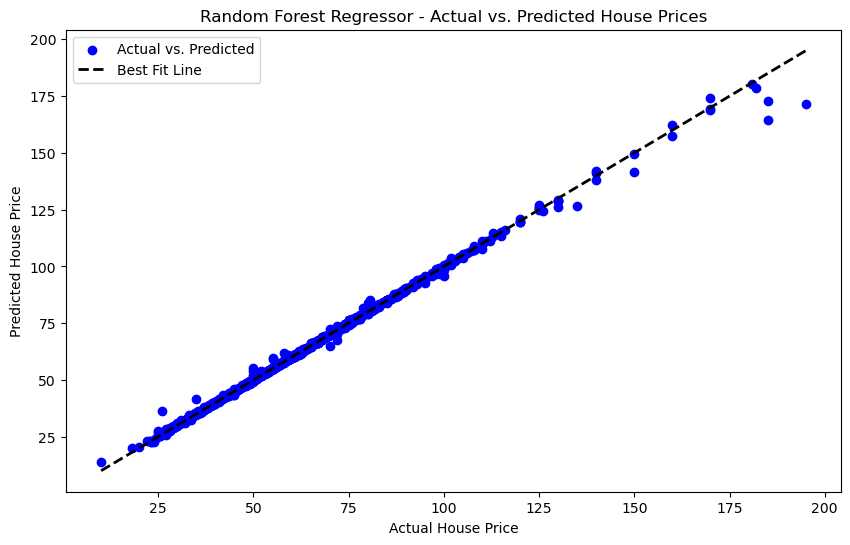

In [42]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred,color='blue',label='Actual vs. Predicted')
plt.plot([y_test.min(),y_test.max()],[y_test.min(), y_test.max()], 'k--',lw=2, label='Best Fit Line')
plt.xlabel('Actual House Price')
plt.ylabel('Predicted House Price')
plt.title('Random Forest Regressor - Actual vs. Predicted House Prices')
plt.legend()
plt.show()

# GRADIENT BOOSTING REGRESSOR

In [43]:
from sklearn.ensemble import GradientBoostingRegressor

# Create a Gradient Boosting Regressor model
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
gb_model.fit(X_train, y_train)

# Predict house prices on the testing set
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
print("Gradient Boosting Regressor - R^2 Score:", r2_gb)


Gradient Boosting Regressor - R^2 Score: 0.996889522383831


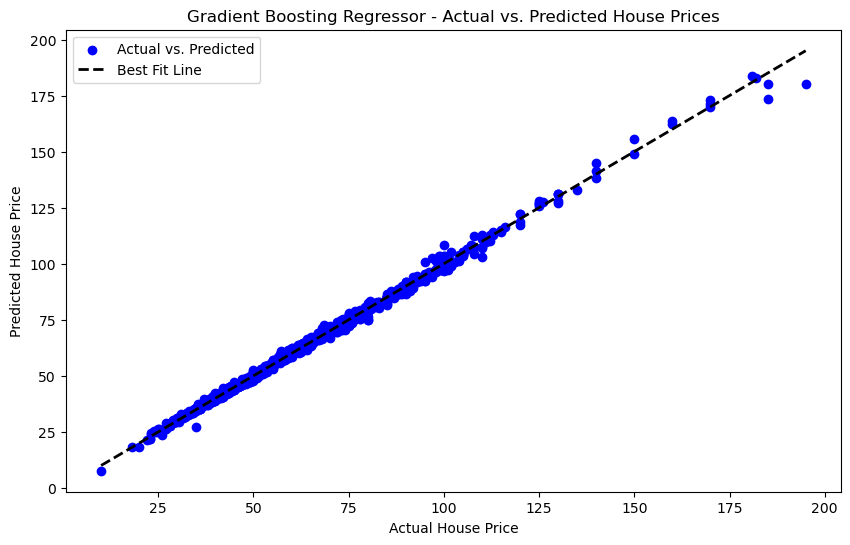

In [44]:
import matplotlib.pyplot as plt

# Plotting the actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gb, color='blue', label='Actual vs. Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Best Fit Line')
plt.xlabel('Actual House Price')
plt.ylabel('Predicted House Price')
plt.title('Gradient Boosting Regressor - Actual vs. Predicted House Prices')
plt.legend()
plt.show()


In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print("Linear Regression - R^2 Score:", r2_lr)


Linear Regression - R^2 Score: 0.9650832596178349


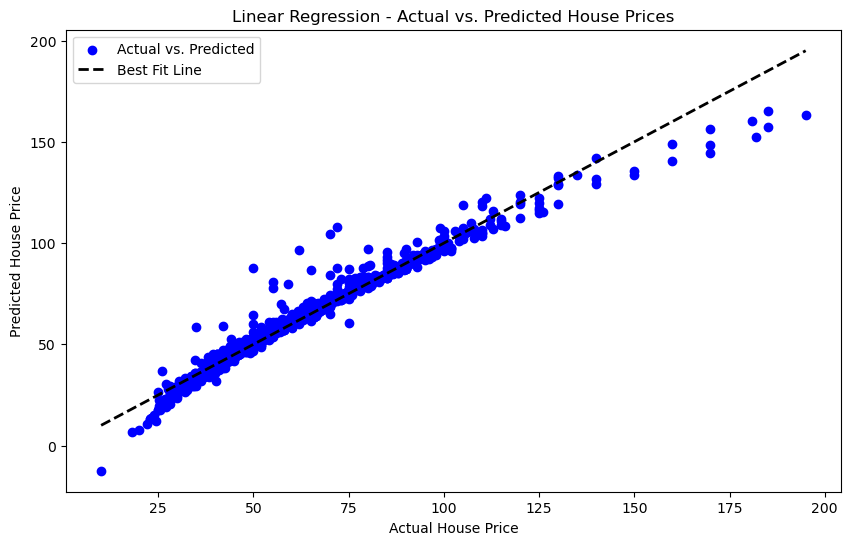

In [46]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, color='blue', label='Actual vs. Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Best Fit Line')
plt.xlabel('Actual House Price')
plt.ylabel('Predicted House Price')
plt.title('Linear Regression - Actual vs. Predicted House Prices')
plt.legend()
plt.show()
